In [10]:
# coding: utf-8
import numpy as np
import pandas as pd
from bokeh.plotting import figure
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.layouts import column

#データ読み込み
df = pd.read_csv("./NHANES_sample_data.csv")
#30行目までを表示
print(df.iloc[1:30])       # show all column
#列数を返す
len(df.columns)
#指定した列を削除
df_new = df.drop(["RIDRETH3", "WTINT2YR", "WTMEC2YR", "DR1TCARB", "DR1TTFAT", "LBXGLU", "BMXHT"],axis=1)
print(df_new.iloc[1:30])       # show all column
print(len(df_new.columns))
#defaultname = ["RIDAGEYR", "RIAGENDR", "BMXWT", "BMXBMI", "LBXGH", "LBDGLUSI"]
#aftername = ["Age", "Gender", "Body_weight", "BMI", "HbA1c", "Glucose"]

#列名を変更
df_new = df.rename(columns={"RIDAGEYR": "Age","RIAGENDR": "Gender", "BMXWT": "Body_weight", "BMXBMI": "BMI", "LBXGH":"HbA1c", "LBDGLUSI": "Glucose"})
print(df_new)
#列数を表示
print(len(df_new.columns))
#一つでもNANのある行を削除
df_new = df_new.dropna(how='any')
#一つでもNANがある行の表示
#xxxxx後回し

df_new['Height'] = np.sqrt(df_new['Body_weight'] / df_new['BMI'])
#列追加されているか確認
print(df_new.columns)

print(df_new.median())
print(df_new.mean())
#median is just to return the real value of the set : strong(or robust) for the outliar
#mean is just to return the measured value from the set
print(df_new.min())
print(df_new.max())
print(df_new.quantile(.25))
print(df_new.quantile(.75))
print(df_new.std())
print(df_new.describe())

df_lim = df_new[(df_new["Age"] >= 20) & ((18.0 <= df_new["BMI"]) <= 50) & ((4.0 <= df_new["Glucose"]) <= 16) & ((4.0 <= df_new["HbA1c"]) <= 10)]

     SEQN      RIDAGEYR  RIAGENDR  RIDRETH3      WTINT2YR      WTMEC2YR  \
1   73558  5.400000e+01         1         3  23682.057390  2.447177e+04   
2   73559  7.200000e+01         1         3  57214.803320  5.719329e+04   
3   73560  9.000000e+00         1         3  55201.178590  5.576651e+04   
4   73561  7.300000e+01         2         3  63709.667070  6.554187e+04   
5   73562  5.600000e+01         1         1  24978.144600  2.534499e+04   
6   73563  5.400000e-79         1         3  18040.818430  1.791356e+04   
7   73564  6.100000e+01         2         3  60325.095250  6.175865e+04   
8   73565  4.200000e+01         1         2  23307.675630  5.400000e-79   
9   73566  5.600000e+01         2         3  16351.783140  1.748012e+04   
10  73567  6.500000e+01         1         3  34002.623000  3.479543e+04   
11  73568  2.600000e+01         2         3  89514.433220  9.152352e+04   
12  73569  5.400000e-79         2         7   6673.803649  5.400000e-79   
13  73570  9.000000e+00  

               SEQN          Age       Gender     RIDRETH3       WTINT2YR  \
count   2887.000000  2887.000000  2887.000000  2887.000000    2887.000000   
mean   78691.109456    42.676827     1.516453     3.241081   37110.588593   
std     2916.600528    20.502991     0.499816     1.511816   29154.324054   
min    73559.000000    12.000000     1.000000     1.000000    5874.209930   
25%    76173.000000    24.000000     1.000000     3.000000   16838.342130   
50%    78723.000000    42.000000     2.000000     3.000000   25570.743080   
75%    81210.500000    60.000000     2.000000     4.000000   47471.408360   
max    83727.000000    80.000000     2.000000     7.000000  167884.543700   

            WTMEC2YR     DR1TCARB      DR1TTFAT  Body_weight          BMI  \
count    2887.000000  2887.000000  2.887000e+03  2887.000000  2887.000000   
mean    38268.338643   251.502650  8.112778e+01    78.963526    28.227918   
std     29950.574870   130.697619  4.821327e+01    22.914181     7.467913  

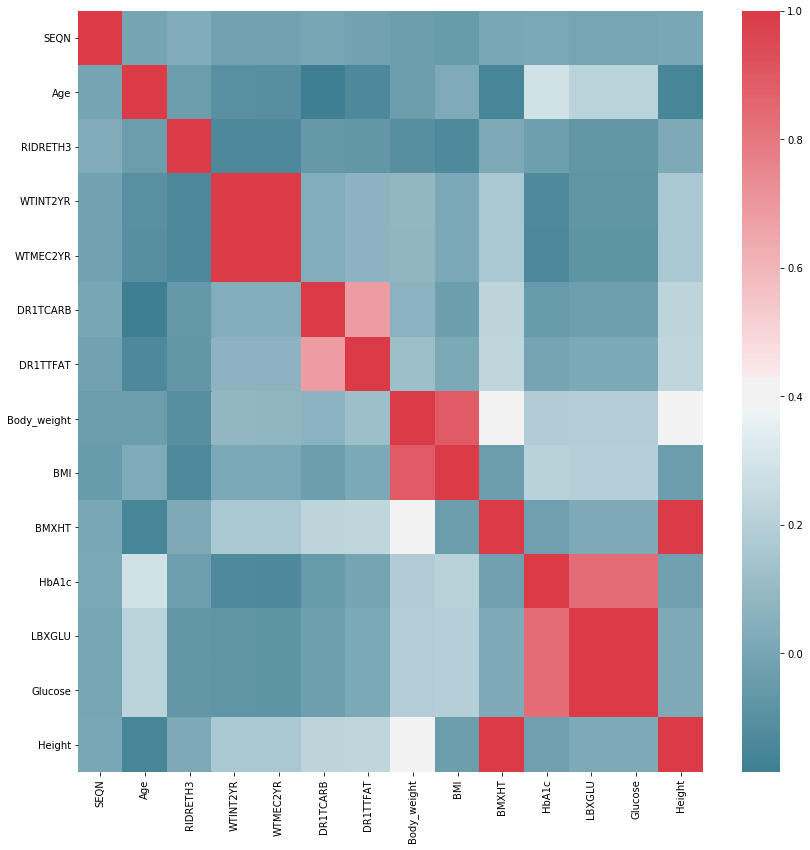

In [138]:
import seaborn as sns
df_lim_exgender = df_lim.drop(["Gender"],axis=1)
df_lim_corr = df_lim_exgender.corr(method="pearson")
#print(df_lim_corr)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(14, 14))
sns.heatmap(df_lim_corr, annot=False, fmt='g', cmap=cmap)#'Blues')

In [142]:
print(round(df_lim.describe()))

          SEQN     Age  Gender  RIDRETH3  WTINT2YR  WTMEC2YR  DR1TCARB  \
count   2329.0  2329.0  2329.0    2329.0    2329.0    2329.0    2329.0   
mean   78669.0    49.0     2.0       3.0   40447.0   41723.0     250.0   
std     2910.0    17.0     0.0       1.0   29999.0   30774.0     130.0   
min    73559.0    20.0     1.0       1.0    5904.0    6107.0       9.0   
25%    76174.0    35.0     1.0       3.0   19351.0   20009.0     163.0   
50%    78703.0    49.0     2.0       3.0   28117.0   29437.0     228.0   
75%    81151.0    63.0     2.0       4.0   53696.0   56182.0     311.0   
max    83727.0    80.0     2.0       7.0  167885.0  171075.0    1424.0   

       DR1TTFAT  Body_weight     BMI   BMXHT   HbA1c  LBXGLU  Glucose  Height  
count    2329.0       2329.0  2329.0  2329.0  2329.0  2329.0   2329.0  2329.0  
mean       82.0         82.0    29.0   167.0     6.0   107.0      6.0     2.0  
std        48.0         22.0     7.0    10.0     1.0    33.0      2.0     0.0  
min         0

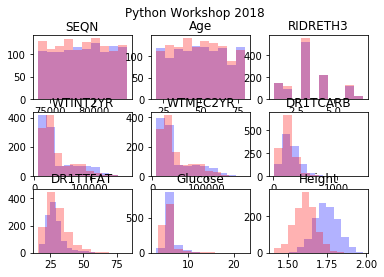

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# matplotlibにてヒストグラムを出力
plt.figure(1)
plt.suptitle("Python Workshop 2018")
plt.subplot(331)
plt.hist(df_lim[df_lim["Gender"]==1].iloc[:,0],alpha=0.3, histtype='stepfilled', color='b');
plt.hist(df_lim[df_lim["Gender"]==2].iloc[:,0],alpha=0.3, histtype='stepfilled', color='r');
plt.title(df_lim.columns[0]);
plt.subplot(332)
plt.hist(df_lim[df_lim["Gender"]==1].iloc[:,1],alpha=0.3, histtype='stepfilled', color='b');
plt.hist(df_lim[df_lim["Gender"]==2].iloc[:,1],alpha=0.3, histtype='stepfilled', color='r');
plt.title(df_lim.columns[1]);
plt.subplot(333)
plt.hist(df_lim[df_lim["Gender"]==1].iloc[:,3],alpha=0.3, histtype='stepfilled', color='b');
plt.hist(df_lim[df_lim["Gender"]==2].iloc[:,3],alpha=0.3, histtype='stepfilled', color='r');
plt.title(df_lim.columns[3]);
plt.subplot(334)
plt.hist(df_lim[df_lim["Gender"]==1].iloc[:,4],alpha=0.3, histtype='stepfilled', color='b');
plt.hist(df_lim[df_lim["Gender"]==2].iloc[:,4],alpha=0.3, histtype='stepfilled', color='r');
plt.title(df_lim.columns[4]);
plt.subplot(335)
plt.hist(df_lim[df_lim["Gender"]==1].iloc[:,5],alpha=0.3, histtype='stepfilled', color='b');
plt.hist(df_lim[df_lim["Gender"]==2].iloc[:,5],alpha=0.3, histtype='stepfilled', color='r');
plt.title(df_lim.columns[5]);
plt.subplot(336)
plt.hist(df_lim[df_lim["Gender"]==1].iloc[:,6],alpha=0.3, histtype='stepfilled', color='b');
plt.hist(df_lim[df_lim["Gender"]==2].iloc[:,6],alpha=0.3, histtype='stepfilled', color='r');
plt.title(df_lim.columns[6]);
plt.subplot(337)
plt.hist(df_lim[df_lim["Gender"]==1].iloc[:,9],alpha=0.3, histtype='stepfilled', color='b');
plt.hist(df_lim[df_lim["Gender"]==2].iloc[:,9],alpha=0.3, histtype='stepfilled', color='r');
plt.title(df_lim.columns[7]);
plt.subplot(338)
plt.hist(df_lim[df_lim["Gender"]==1].iloc[:,13],alpha=0.3, histtype='stepfilled', color='b');
plt.hist(df_lim[df_lim["Gender"]==2].iloc[:,13],alpha=0.3, histtype='stepfilled', color='r');
plt.title(df_lim.columns[13]);
plt.subplot(339)
plt.hist(df_lim[df_lim["Gender"]==1].iloc[:,14],alpha=0.3, histtype='stepfilled', color='b');
plt.hist(df_lim[df_lim["Gender"]==2].iloc[:,14],alpha=0.3, histtype='stepfilled', color='r');
plt.title(df_lim.columns[14]);

plt.show()


In [141]:
#Bokehによるヒストグラム一例
#所感1：色指定が難しい？color paletteはあるみたいだが、なんかerrorを吐き出す。色指定のルールを学ぶ必要あり。
#所感2：きれいだが、チューニングが面倒。素早く可視化したいなら、やはりMatplotlibがおすすめ。
#所感3：全体のtitleどうつける？
#総括：
#プロトタイプ(スピード重視)⇒Matplotlib;
#最終成果物用(質重視)⇒Bokeh;

output_notebook()
from bokeh.layouts import gridplot, row, column
from bokeh.plotting import figure, show, output_file
p1 = figure(title=df_lim.columns[0],tools="save",
            background_fill_color="#E8DDCB")
x = np.linspace(df_lim.iloc[:,0].min(), df_lim.iloc[:,0].max(), len(df_lim))
hist, edges = np.histogram(df_lim[df_lim["Gender"]==1].iloc[:,0], density=False, bins=50)
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="blue", alpha=0.3, line_color="blue", legend="male")
hist, edges = np.histogram(df_lim[df_lim["Gender"]==2].iloc[:,0], density=False, bins=50)
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="orange", alpha=0.3, line_color="orange", legend="female")
p1.legend.location = "center_right"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = '# of SEQN'

p2 = figure(title=df_lim.columns[1],tools="save",
            background_fill_color="#E8DDCB")
x = np.linspace(df_lim.iloc[:,1].min(), df_lim.iloc[:,1].max(), len(df_lim))
hist, edges = np.histogram(df_lim[df_lim["Gender"]==1].iloc[:,1], density=False, bins=50)
p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="blue", alpha=0.3, line_color="blue", legend="male")
hist, edges = np.histogram(df_lim[df_lim["Gender"]==2].iloc[:,1], density=False, bins=50)
p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="orange", alpha=0.3, line_color="orange", legend="female")
p2.legend.location = "center_right"
p2.legend.background_fill_color = "darkgrey"
p2.xaxis.axis_label = 'x'
p2.yaxis.axis_label = '# of Age'

p3 = figure(title=df_lim.columns[13],tools="save",
            background_fill_color="#E8DDCB")
x = np.linspace(df_lim.iloc[:,13].min(), df_lim.iloc[:,13].max(), len(df_lim))
hist, edges = np.histogram(df_lim[df_lim["Gender"]==1].iloc[:,13], density=False, bins=50)
p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="blue", alpha=0.3, line_color="blue", legend="male")
hist, edges = np.histogram(df_lim[df_lim["Gender"]==2].iloc[:,13], density=False, bins=50)
p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="orange", alpha=0.3, line_color="orange", legend="female")
p3.legend.location = "center_right"
p3.legend.background_fill_color = "darkgrey"
p3.xaxis.axis_label = 'x'
p3.yaxis.axis_label = '# of Glucose'


p4 = figure(title=df_lim.columns[14],tools="save",
            background_fill_color="#E8DDCB")
x = np.linspace(df_lim.iloc[:,14].min(), df_lim.iloc[:,14].max(), len(df_lim))
hist, edges = np.histogram(df_lim[df_lim["Gender"]==1].iloc[:,14], density=False, bins=50)
p4.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="blue", alpha=0.3, line_color="blue", legend="male")
hist, edges = np.histogram(df_lim[df_lim["Gender"]==2].iloc[:,14], density=False, bins=50)
p4.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="orange", alpha=0.3, line_color="orange", legend="female")
p4.legend.location = "center_right"
p4.legend.background_fill_color = "darkgrey"
p4.xaxis.axis_label = 'x'
p4.yaxis.axis_label = '# of Height'

show(column(row(p1,p2),row(p3,p4)))

Loading BokehJS ...

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: b [renderer: GlyphRenderer(id='a3940ae9-206d-41c9-a8ba-60cb20e167e3', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: b [renderer: GlyphRenderer(id='81eb86b8-bb5d-4983-a192-0003f112a6a1', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: '#35B778' [renderer: GlyphRenderer(id='3ead88fb-56ad-4e55-8383-627eaff62a74', ...)]
